In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=(12,7)

In [2]:
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
# seclecting categorical and numerical coumn
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [9]:
# making sure that i got all the columns and did not miss any
len(df.columns) == (len(cat_col) + len(num_col)) # chcekmng sum of column 

True

In [10]:
# replacing '?' as missing values
df.replace(to_replace='?', value=np.nan, inplace=True)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [11]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [16]:
# cchecking the percentage of missing rows to all rows
per = round((1843 / df.shape[0])*100,3)
print(f'The Missing value percentage {per}%')

The Missing value percentage 5.66%


The percentage of null values in total: `5.66 %`
Now the rule says i can drop null values row if the percentage is equal to ot lessthat `5%`, but here the rule is almost satisfying, also i can't fill those by any fillna methode, the null values are present on the workclass, occupation, and native-country, althoug i can assume the country but the other two will be wron information if i put most-frequnt or other null value methode.

I will just drop those rows.

In [ ]:
num_df = df.select_dtypes(include=['int64', 'float64'])

#### checking numerical column first

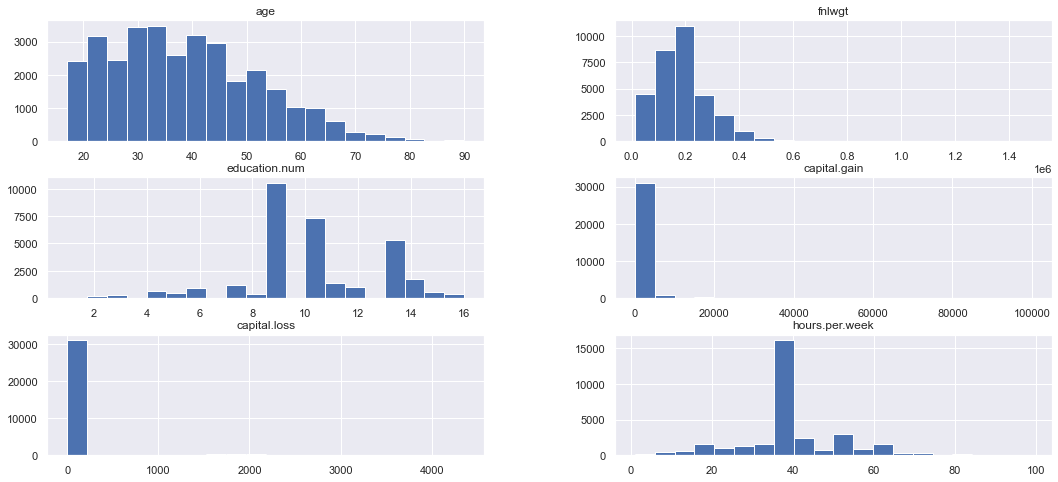

In [51]:
# plotting numerical column only
num_df.hist(figsize=(18,8), bins=20);

In [52]:
num_df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


* `age` - most of the people age are between `20 to 50`
* `fnlwgt` - this column contain very low range of values.
* `education_num` - This column consist of the euducation have for each people in numerical form. 
* `capital.gain`, `capital.loss` - these two column have huge outliears. have to drop these columns
* `hours.per.week` - how much each people works in a week


#### Now checnking these column in more details

In [53]:
# creating `age group` column
age_group = [17, 21, 30, 40,  50, 60, 70, 80, 90,  np.inf]
age_lbl = ['17-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-above']
# creating new column
df['age_groups'] = pd.cut(df['age'], bins=age_group, labels=age_lbl)

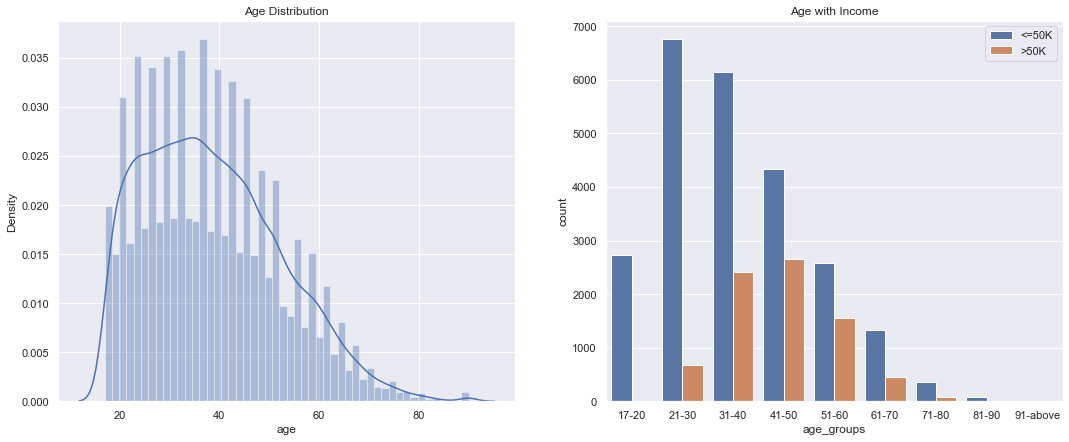

In [54]:
plt.figure(figsize=(18,7))
plt.subplot(1,2,1)
sns.distplot(df['age']);
plt.title('Age Distribution')
plt.subplot(1,2,2)
sns.countplot(x='age_groups', data=df, hue='income');
plt.title('Age with Income')
plt.legend(loc='upper right');

Most people age are `20 to 50` on the dataset. and the most of people those age are between `40 to 50` are income more than `50k`

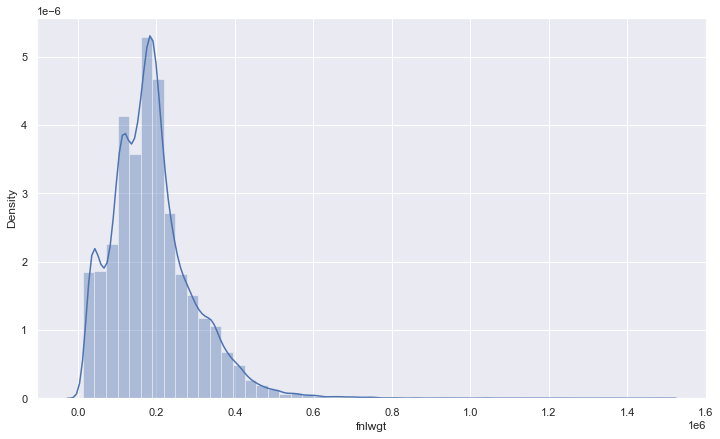

In [55]:
# checking the 'fnlwgt' or final weight column
sns.distplot(df['fnlwgt']);

This `fnlwgt` column have values upto `1.4` with outliars, the mostof majority of the data is lie under `0.4` as this column has very low value, and also many `zero`. it will better to drop this column.

In [56]:
# dropoping the `fnlwgt` coulmn
df.drop('fnlwgt', axis=1, inplace=True)
print('Column Droped')

Column Droped


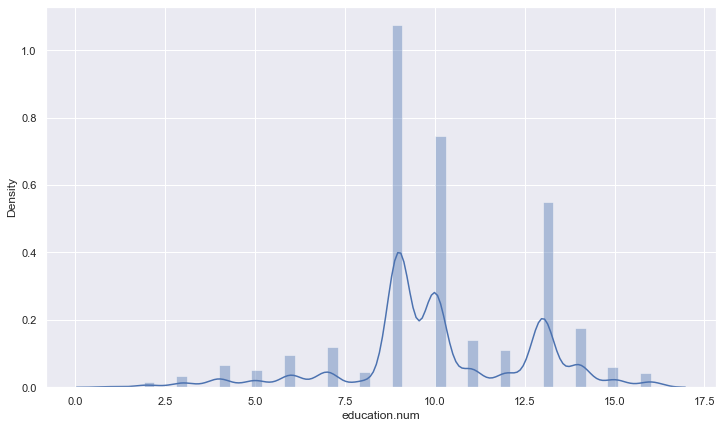

In [57]:
# checking the education.num column
sns.distplot(df['education.num']);

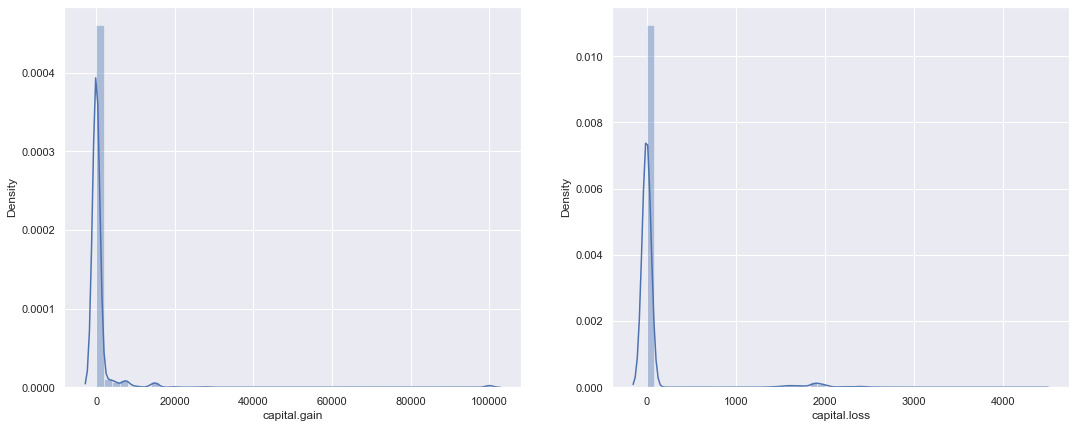

In [60]:
# capital gain and capital loss columns
plt.figure(figsize=(18,7))
plt.subplot(1,2,1)
sns.distplot(df['capital.gain']);
plt.subplot(1,2,2)
sns.distplot(df['capital.loss']);

In [61]:
# droping these column
df.drop(['capital.gain', 'capital.loss'], axis=1, inplace=True)
print('Column Droped')

Column Droped


Max hour:  99
Min hour:  1
Total Hours in a week: 168


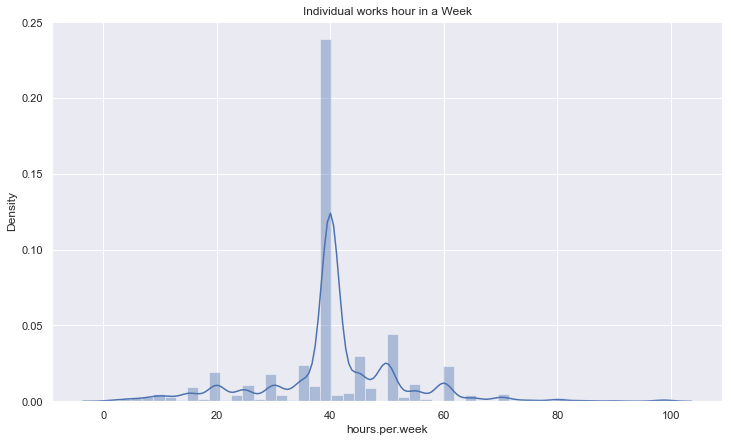

In [70]:
# checking the hours.per.week column
sns.distplot(df['hours.per.week']);
plt.title('Individual works hour in a Week');

# checking the max and min value
print('Max hour: ',df['hours.per.week'].max())
print('Min hour: ',df['hours.per.week'].min())
print(f'Total Hours in a week: {7*24}' )

The value is long tail to right side, adn i can use `quantile` to remove these value. but for come up that decision, i need further permission.

In [76]:
 # now 7*12 = 184, i have consider these people work more than 12 hours everyday
hard_work = df[df['hours.per.week']>84]
hard_work.head()
# only people who work more thn 84 hours in a week

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income,age_groups
29,38,Private,10th,6,Never-married,Prof-specialty,Not-in-family,White,Male,90,United-States,>50K,31-40
92,39,Private,Some-college,10,Married-civ-spouse,Farming-fishing,Husband,White,Male,99,United-States,>50K,31-40
98,39,Private,Prof-school,15,Married-civ-spouse,Sales,Husband,White,Male,99,United-States,>50K,31-40
106,38,Private,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,90,United-States,>50K,31-40
409,38,Private,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,99,United-States,>50K,31-40


In [83]:
hard_work['income'].value_counts()

<=50K    113
>50K      46
Name: income, dtype: int64

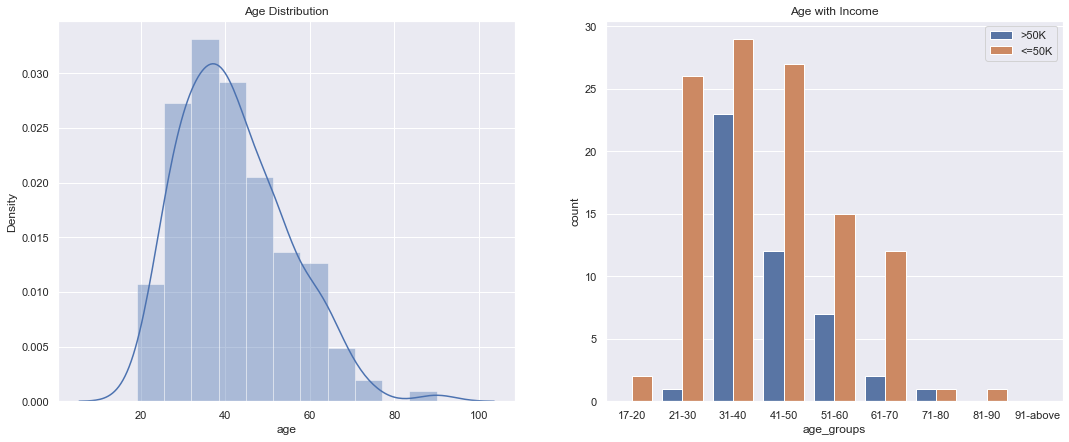

In [78]:
# now plot some graph for more analize

# age of these people
plt.figure(figsize=(18,7))
plt.subplot(1,2,1)
sns.distplot(hard_work['age']);
plt.title('Age Distribution')
plt.subplot(1,2,2)
sns.countplot(x='age_groups', data=hard_work, hue='income');
plt.title('Age with Income')
plt.legend(loc='upper right');

the trend of income `>50k` is not much high here, and ,although they are working hard but the the trend is not high.

I my consider to take values 99 pencentile of total value.

In [87]:
q = df['hours.per.week'].quantile(q = 0.99) # it return a single value
q

80.0

Max hour:  78
Min hour:  1
Total Hours in a week: 168


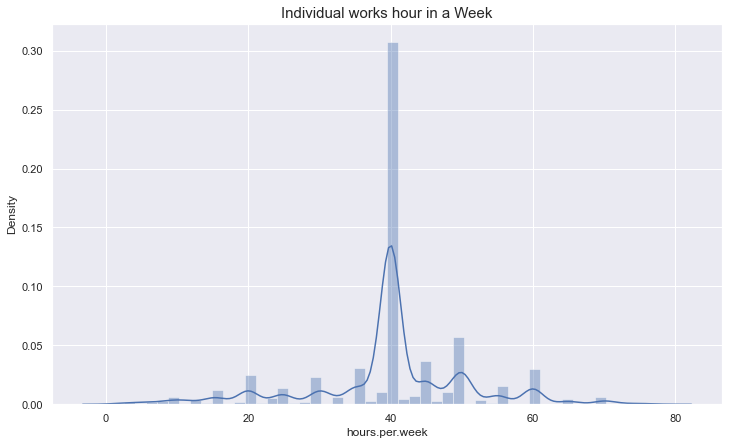

In [110]:
# repleacing this value to dataframe
df1 = df[df['hours.per.week']<q]
# checking the hours.per.week column
sns.distplot(df1['hours.per.week']);
plt.title('Individual works hour in a Week', fontsize=15);

# checking the max and min value
print('Max hour: ',df1['hours.per.week'].max())
print('Min hour: ',df1['hours.per.week'].min())
print(f'Total Hours in a week: {7*24}' )

## categorical column

In [96]:
cat_df = df1.select_dtypes(include=['object', 'category'])
cat_df

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income,age_groups
0,NaN,HS-grad,Widowed,NaN,Not-in-family,White,Female,United-States,<=50K,81-90
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K,81-90
2,NaN,Some-college,Widowed,NaN,Unmarried,Black,Female,United-States,<=50K,61-70
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K,51-60
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K,41-50
...,...,...,...,...,...,...,...,...,...,...
32556,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,United-States,<=50K,21-30
32557,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K,21-30
32558,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K,31-40
32559,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K,51-60


In [94]:
# creating function to plot categorical columns
def cat_plot(col,hue=None):
    fig, ax1 = plt.subplots(figsize=(20,10))
    graph = sns.countplot(ax=ax1,x=col, data=df1,hue=hue);
    plt.xlabel(col, fontsize=15);
    plt.ylabel('Count', fontsize=15);
    graph.set_xticklabels(graph.get_xticklabels(),rotation=90, fontdict={'fontsize': 15, 
                                                                       'horizontalalignment':'center'});
    for p in graph.patches:
        height = p.get_height();
        graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center",fontdict={'fontsize': 16, 
                                                                       'horizontalalignment':'center'});

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


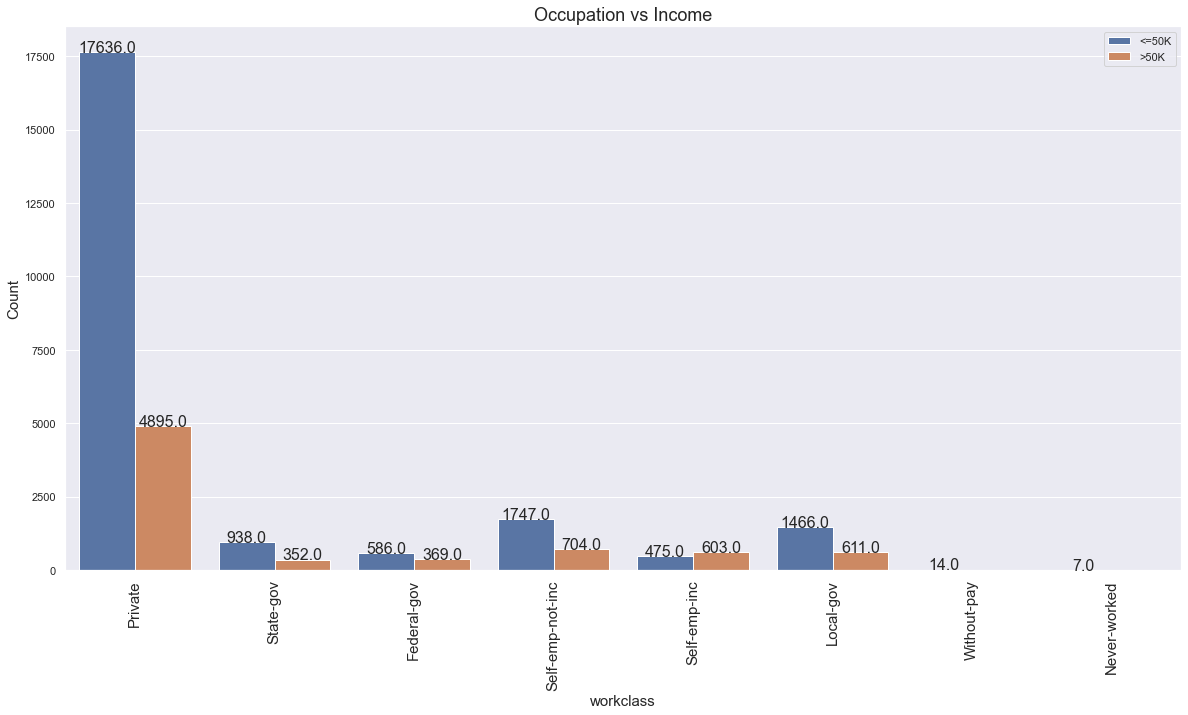

In [109]:
cat_plot('workclass', hue='income');
plt.title('Occupation vs Income', fontsize=18);
plt.legend(loc='upper right');

posx and posy should be finite values
posx and posy should be finite values


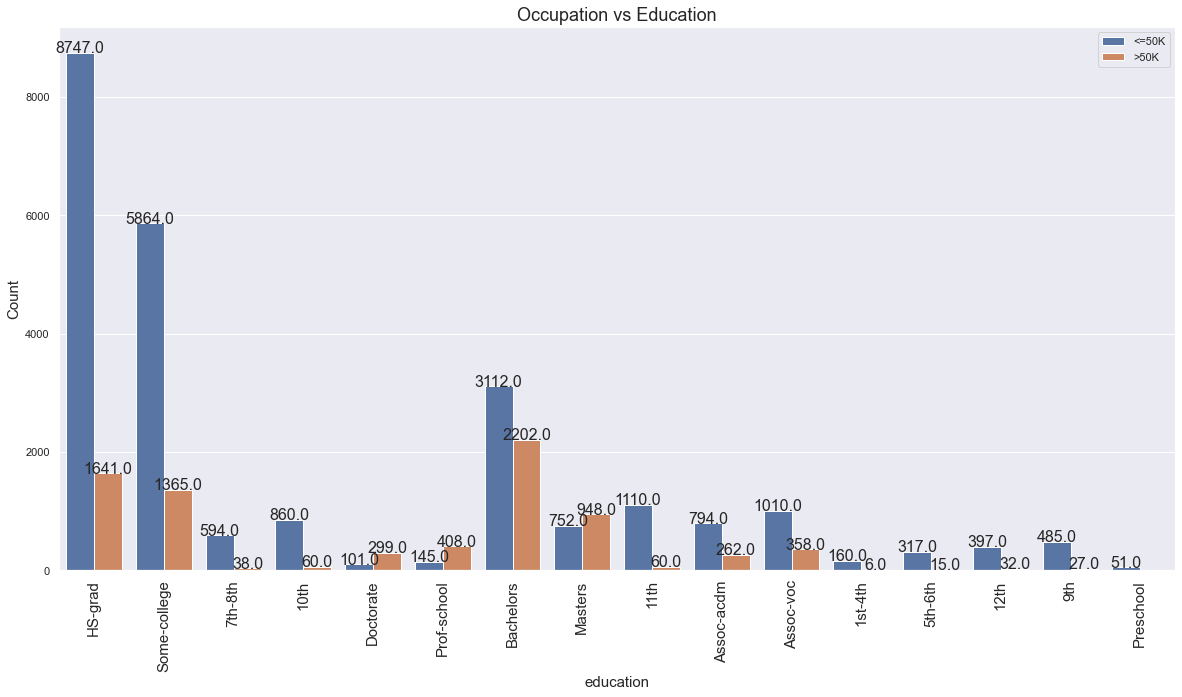

In [111]:
cat_plot('education', hue='income');
plt.title('Occupation vs Education', fontsize=18);
plt.legend(loc='upper right');

The education columns has many education label, most of them are very similar to each other, like `7th to 8th` to `10th` and `12th` to `HS-grad`. 
FIltering them and grouping them will help on model creation time


In [114]:
# creating a function to replace those value
def edu_rep(text):
    school = ['HS-grad', '11th', '10th', '7th-8th', '9th', '12th', '5th-6th', '1st-4th', 'Preschool']
    college = ['Some-college','Bachelors','Prof-school']
    master = ['Masters', 'Doctorate']
    associ = ['Assoc-voc', 'Assoc-acdm']
    # checking the value that is inside of edu list
    if text in school:
        return 'School Level'
    elif text in college:
        return 'College Level'
    elif text in master:
        return 'Masters'
    elif text in associ:
        return 'Associate'
    
# applyin on education column
df1['Education Lavel'] = df1['education'].apply(lambda x: edu_rep(x))

School Level     14600
College Level    13096
Associate         2424
Masters           2100
Name: Education Lavel, dtype: int64


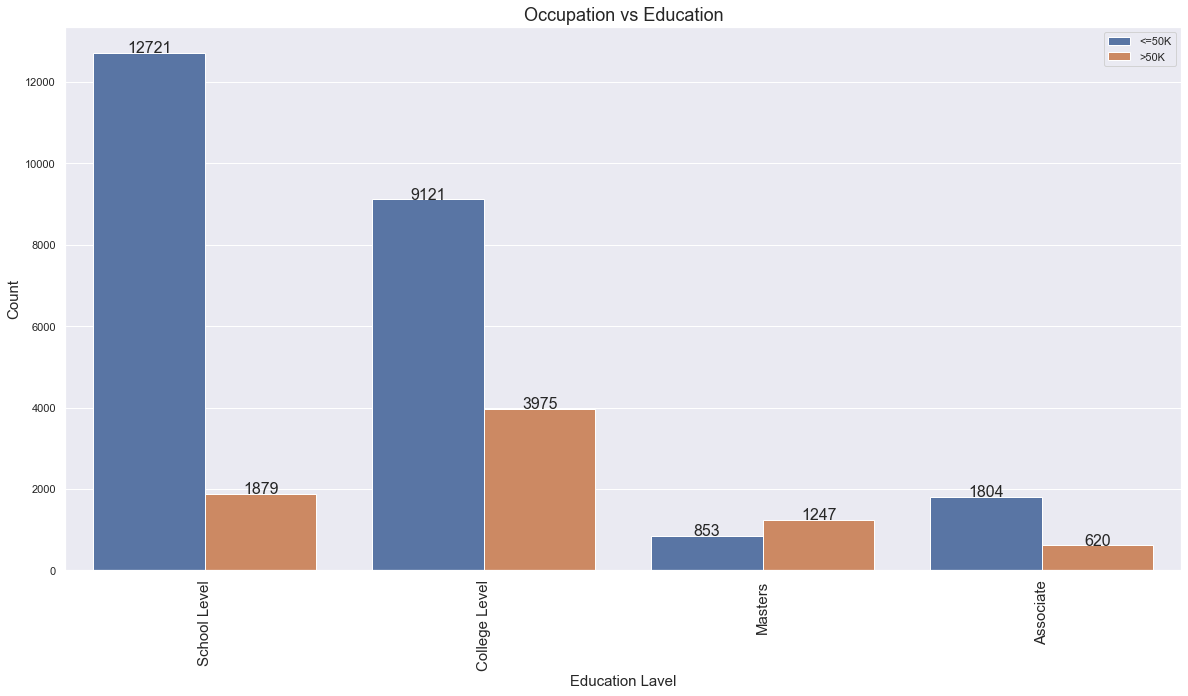

In [116]:
print(df1['Education Lavel'].value_counts())
# potting again
cat_plot('Education Lavel', hue='income');
plt.title('Occupation vs Education', fontsize=18);
plt.legend(loc='upper right');

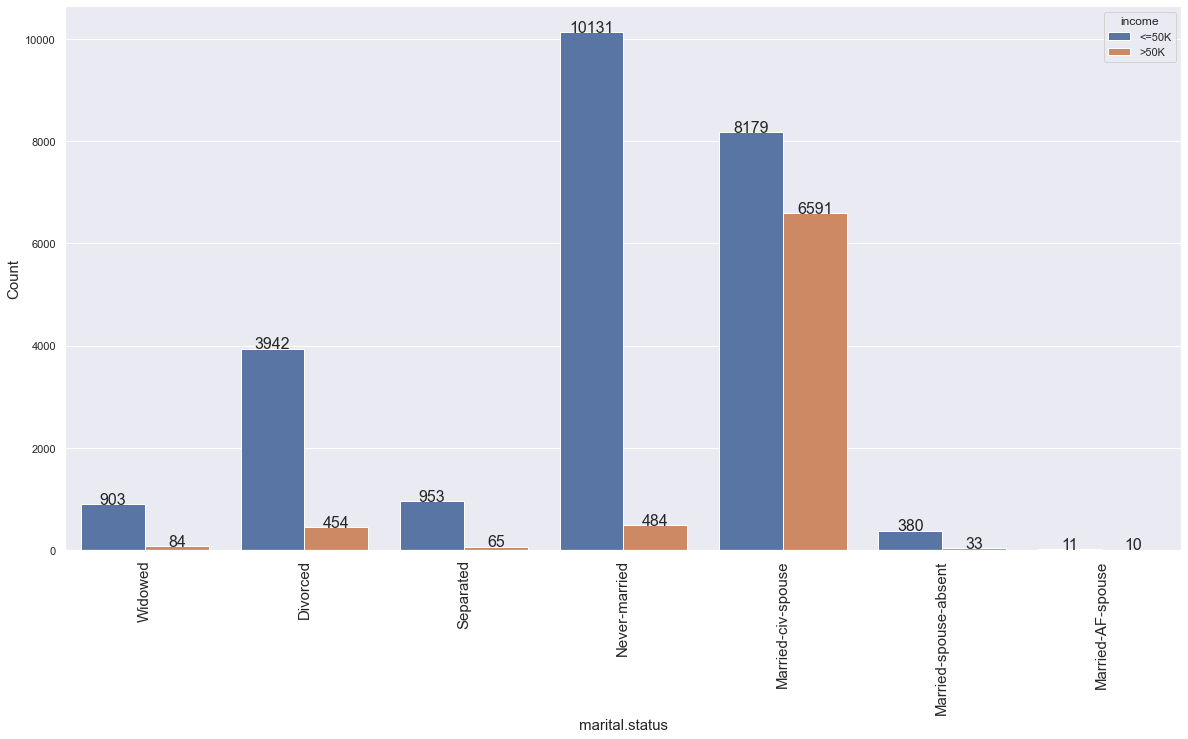

In [117]:
# plotting marital.status column
cat_plot('marital.status', hue='income')

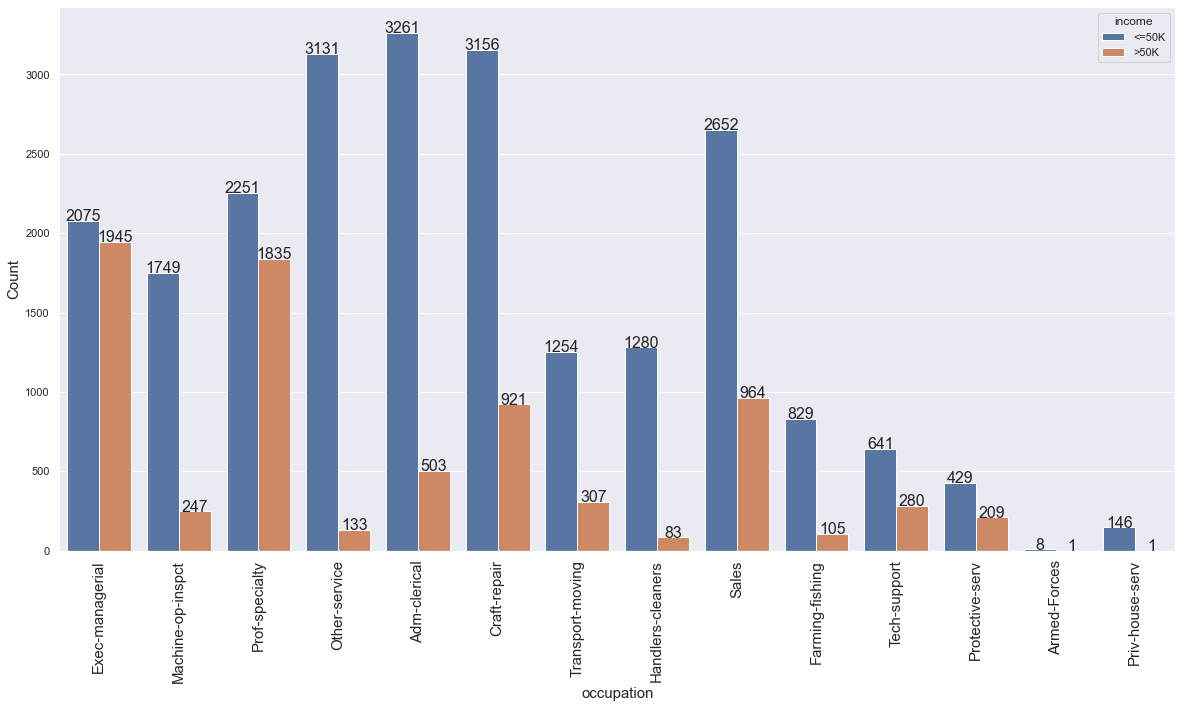

In [118]:
# checking occupation column
cat_plot('occupation', hue='income')

In [119]:
df1['occupation'].value_counts()

Prof-specialty       4086
Craft-repair         4077
Exec-managerial      4020
Adm-clerical         3764
Sales                3616
Other-service        3264
Machine-op-inspct    1996
Transport-moving     1561
Handlers-cleaners    1363
Farming-fishing       934
Tech-support          921
Protective-serv       638
Priv-house-serv       147
Armed-Forces            9
Name: occupation, dtype: int64

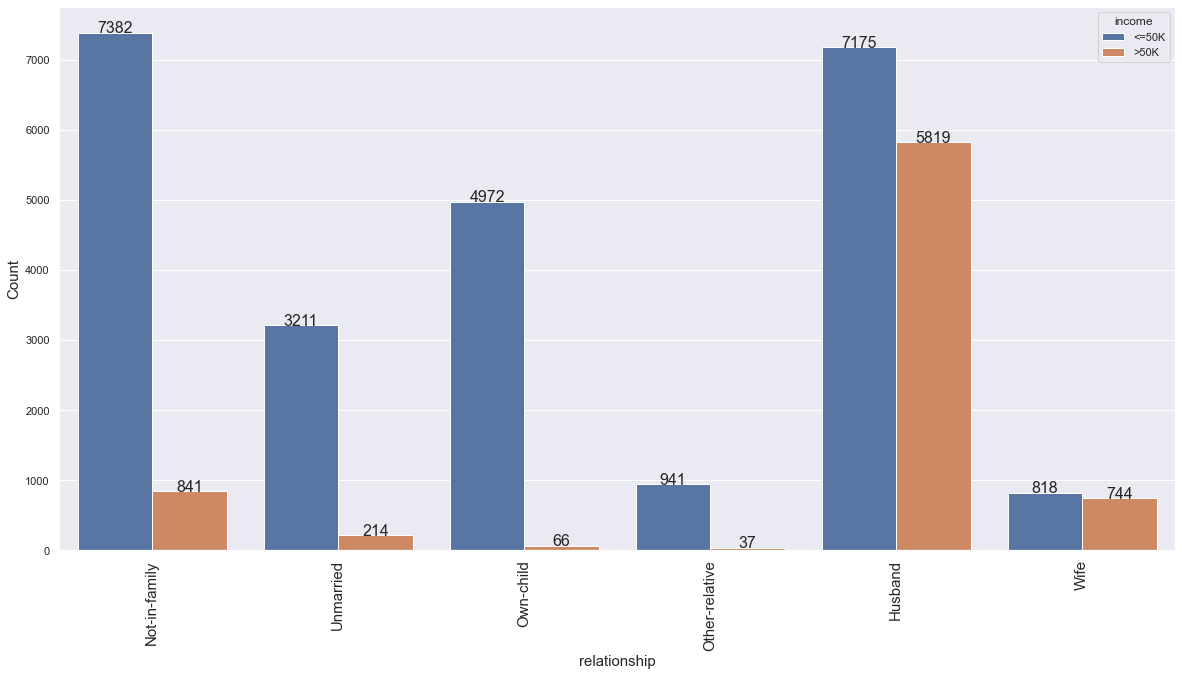

In [120]:
# checking relationship column
cat_plot('relationship', hue='income')

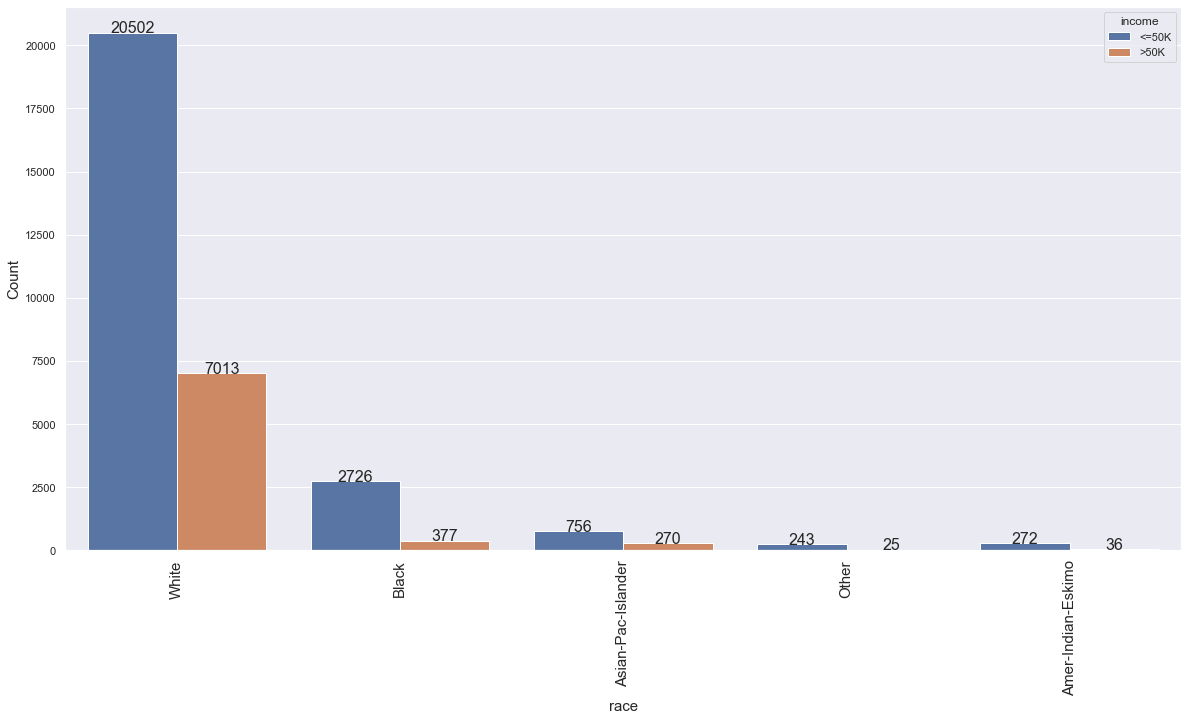

In [121]:
# chcecking race column
cat_plot('race', hue='income')

### By seeing abobe two columns `relationship` and `race` column, it will be better to remove these column.
because the most of the majority in `race` column is `white` and the `relation` should not effect the income.

In [123]:
df1.drop(['relationship', 'race'], axis=1, inplace=True)
print('Column droped')

Column droped


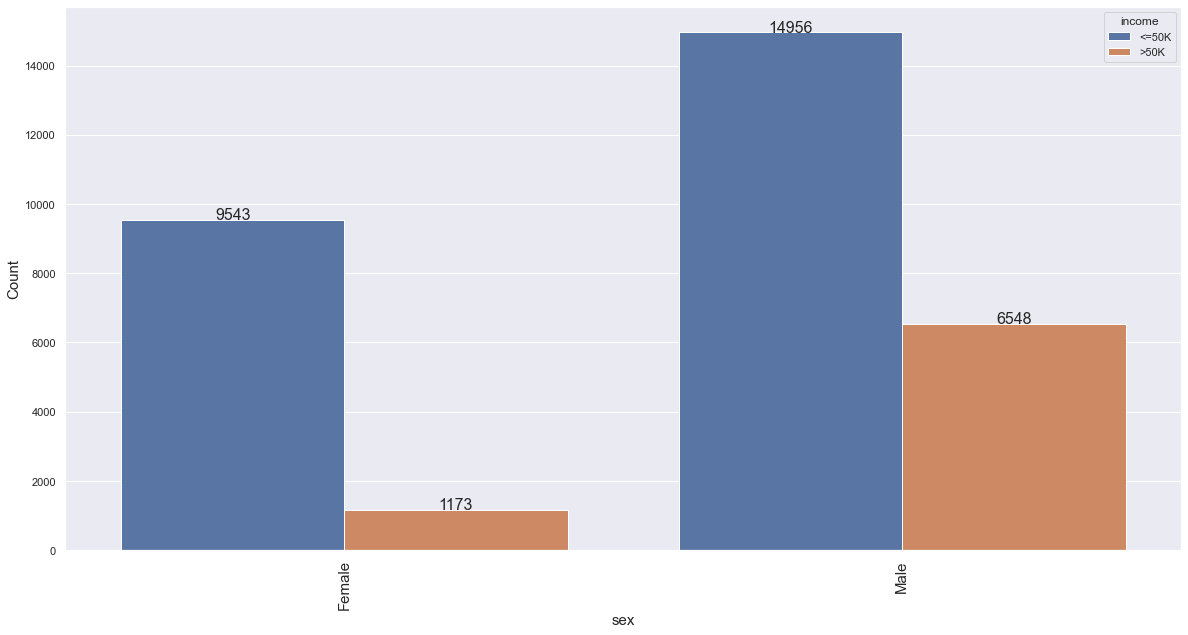

In [124]:
# seeing the sex column
cat_plot('sex', hue='income')

In [125]:
# sex is also not dependent with income 
df1.drop('sex', axis=1, inplace=True)
print('Droped')

Droped


In [126]:
# checking native.country
df1['native.country'].value_counts()

United-States                 28858
Mexico                          638
Philippines                     195
Germany                         137
Canada                          121
Puerto-Rico                     113
El-Salvador                     106
India                            99
Cuba                             95
England                          88
Jamaica                          81
South                            79
China                            75
Italy                            71
Dominican-Republic               69
Vietnam                          67
Guatemala                        64
Poland                           60
Japan                            60
Columbia                         59
Taiwan                           50
Haiti                            44
Iran                             43
Portugal                         36
Nicaragua                        34
Peru                             31
Greece                           29
France                      

In [128]:
# majority is on USA.
df1.drop('native.country', axis=1, inplace=True)

In [129]:
df1.head()

,age,workclass,education,education.num,marital.status,occupation,hours.per.week,income,age_groups,Education Lavel
0,90,NaN,HS-grad,9,Widowed,NaN,40,<=50K,81-90,School Level
1,82,Private,HS-grad,9,Widowed,Exec-managerial,18,<=50K,81-90,School Level
2,66,NaN,Some-college,10,Widowed,NaN,40,<=50K,61-70,College Level
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,40,<=50K,51-60,School Level
4,41,Private,Some-college,10,Separated,Prof-specialty,40,<=50K,41-50,College Level


In [130]:
df1.isnull().sum()

age                   0
workclass          1817
education             0
education.num         0
marital.status        0
occupation         1824
hours.per.week        0
income                0
age_groups          395
Education Lavel       0
dtype: int64

# in final drop the missing value first 

In [131]:
df1.dropna(axis=0, inplace=True)